<a href="https://colab.research.google.com/github/Walpapa/House-price-prediction-usa/blob/main/House_prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import datetime

In [ ]:
data=pd.read_csv('data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data=data.drop(['date'],axis=1)

In [ ]:
x=data.drop(['price'],axis=1)
y=data['price']

In [ ]:
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [ ]:
y

0       3.130000e+05
1       2.384000e+06
2       3.420000e+05
3       4.200000e+05
4       5.500000e+05
            ...     
4595    3.081667e+05
4596    5.343333e+05
4597    4.169042e+05
4598    2.034000e+05
4599    2.206000e+05
Name: price, Length: 4600, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
train_data=X_train.join(y_train)

In [ ]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price
28,5.0,2.50,2820,67518,2.0,0,0,3,2820,0,1979,2014,23525 SE 32nd Way,Issaquah,WA 98029,USA,675000.0
1144,2.0,1.00,800,3330,1.0,0,0,3,800,0,1918,0,108 NW 41st St,Seattle,WA 98107,USA,373500.0
2794,4.0,2.50,1910,7683,2.0,0,0,3,1910,0,1987,2000,4513 186th Ave SE,Issaquah,WA 98027,USA,620000.0
742,4.0,1.75,1890,8000,1.0,0,0,4,1250,640,1960,2001,2145 N 178th St,Shoreline,WA 98133,USA,375000.0
1662,5.0,3.00,3640,8239,2.0,0,3,3,2540,1100,1982,0,17200 SE 29th Ct,Bellevue,WA 98008,USA,1595000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA,4668000.0
1164,2.0,1.00,740,11250,1.0,0,0,2,740,0,1938,0,11050 24th Pl SW,Seattle,WA 98146,USA,235750.0
4029,3.0,2.50,1520,4170,2.0,0,0,3,1520,0,2004,2003,24312 226th Ave SE,Maple Valley,WA 98038,USA,296475.0
2087,3.0,1.00,1410,5060,1.0,0,0,4,910,500,1956,0,10711 Ashworth Ave N,Seattle,WA 98133,USA,410000.0


array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

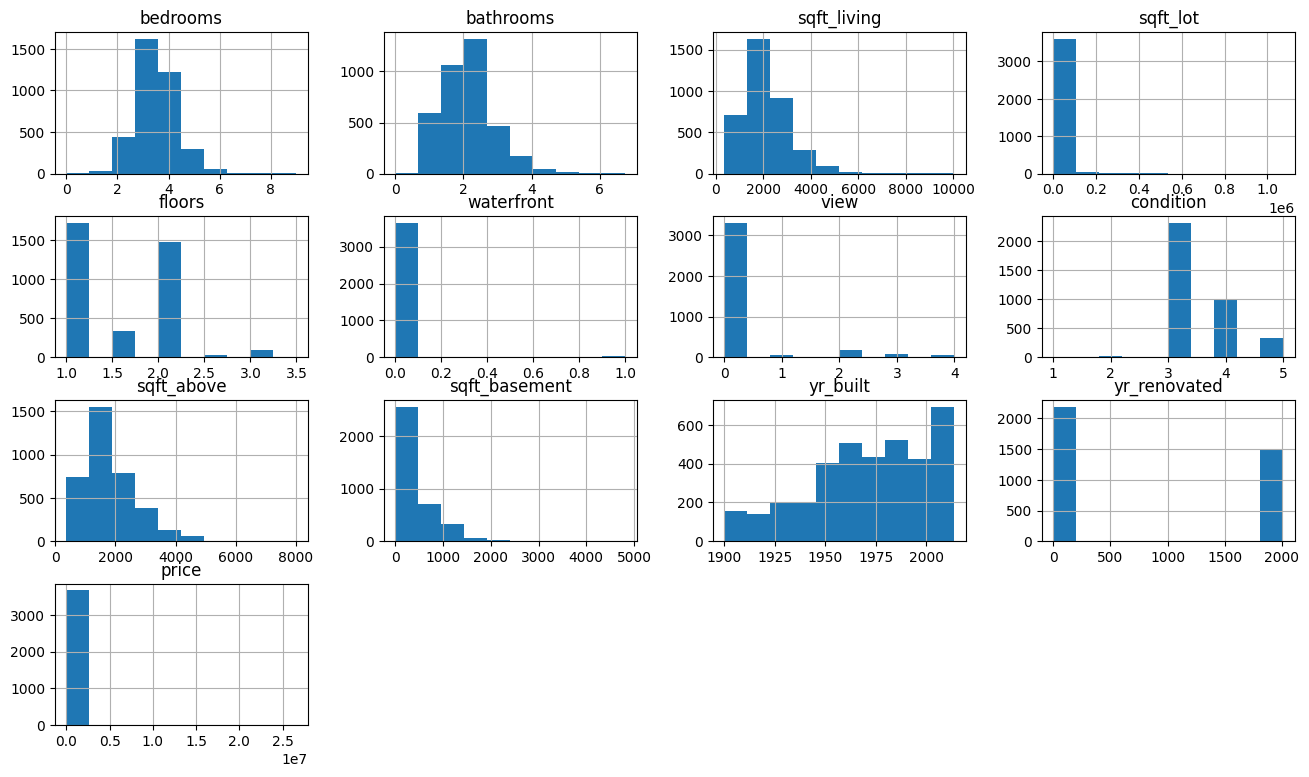

In [ ]:
train_data.hist(figsize=(16, 9))

<ipython-input-15-394d4c8fab76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="summer")


<Axes: >

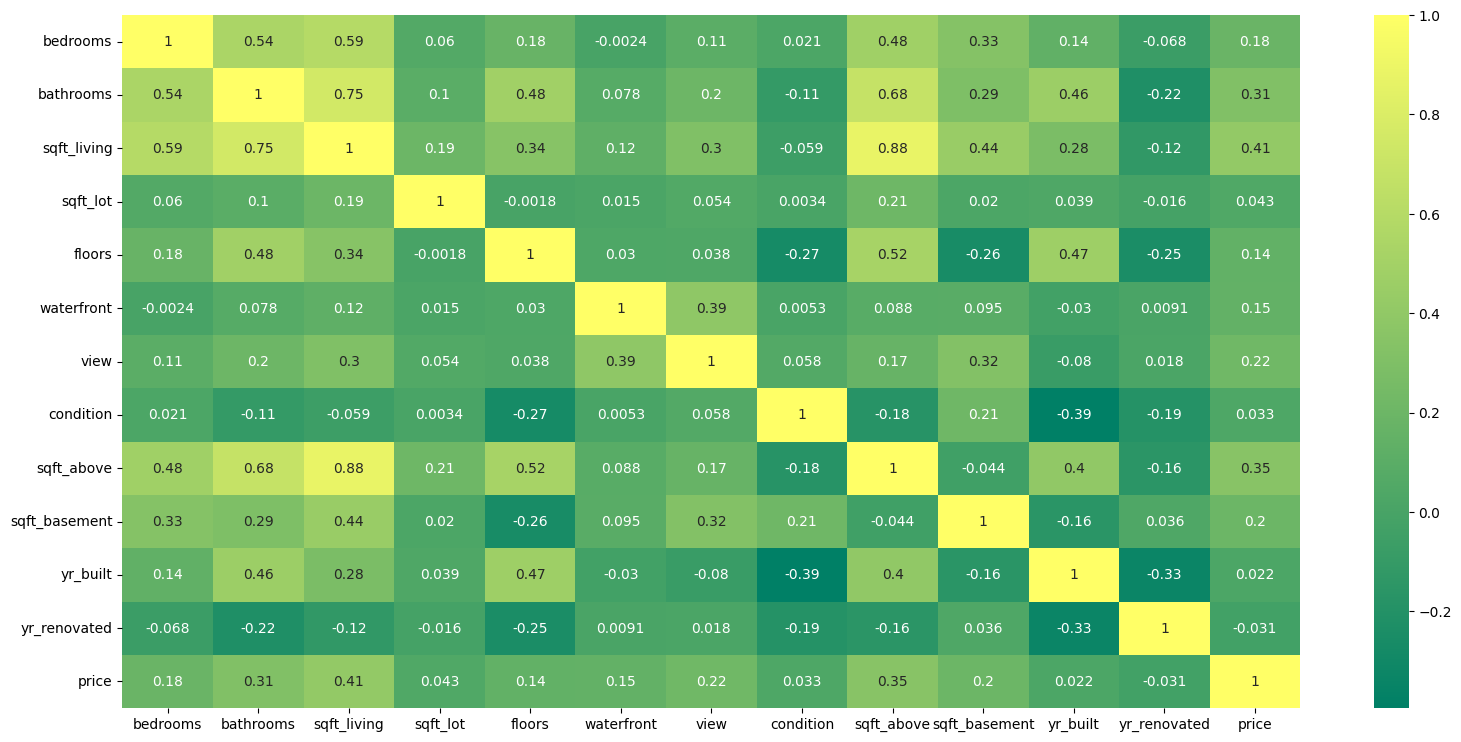

In [ ]:
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(),annot=True,cmap="summer")

In [ ]:
train_data['sqft_basement']=np.log(train_data["sqft_basement"]+1)
train_data['sqft_living']=np.log(train_data["sqft_living"]+1)
train_data['sqft_lot']=np.log(train_data["sqft_lot"]+1)
train_data['sqft_above']=np.log(train_data["sqft_above"]+1)

array([[<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>],
       [<Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

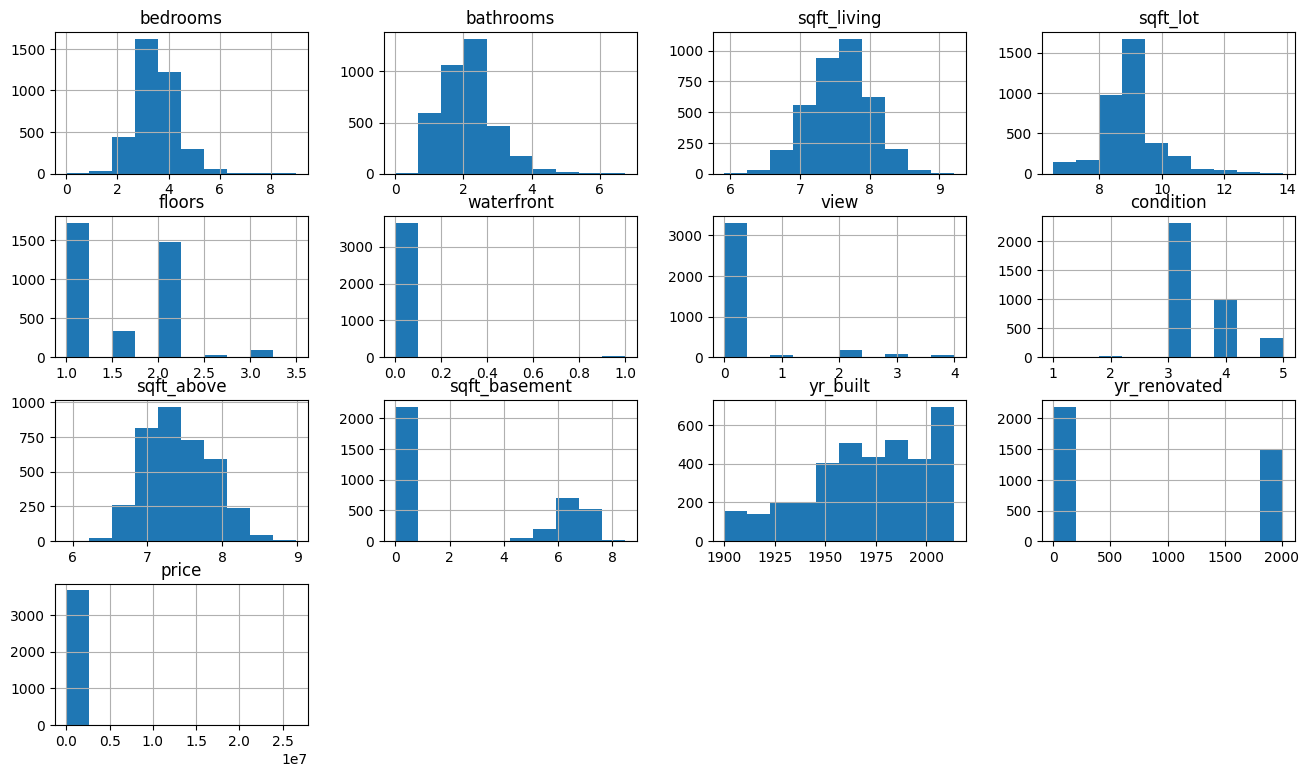

In [ ]:
train_data.hist(figsize=(16, 9))

<ipython-input-18-394d4c8fab76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="summer")


<Axes: >

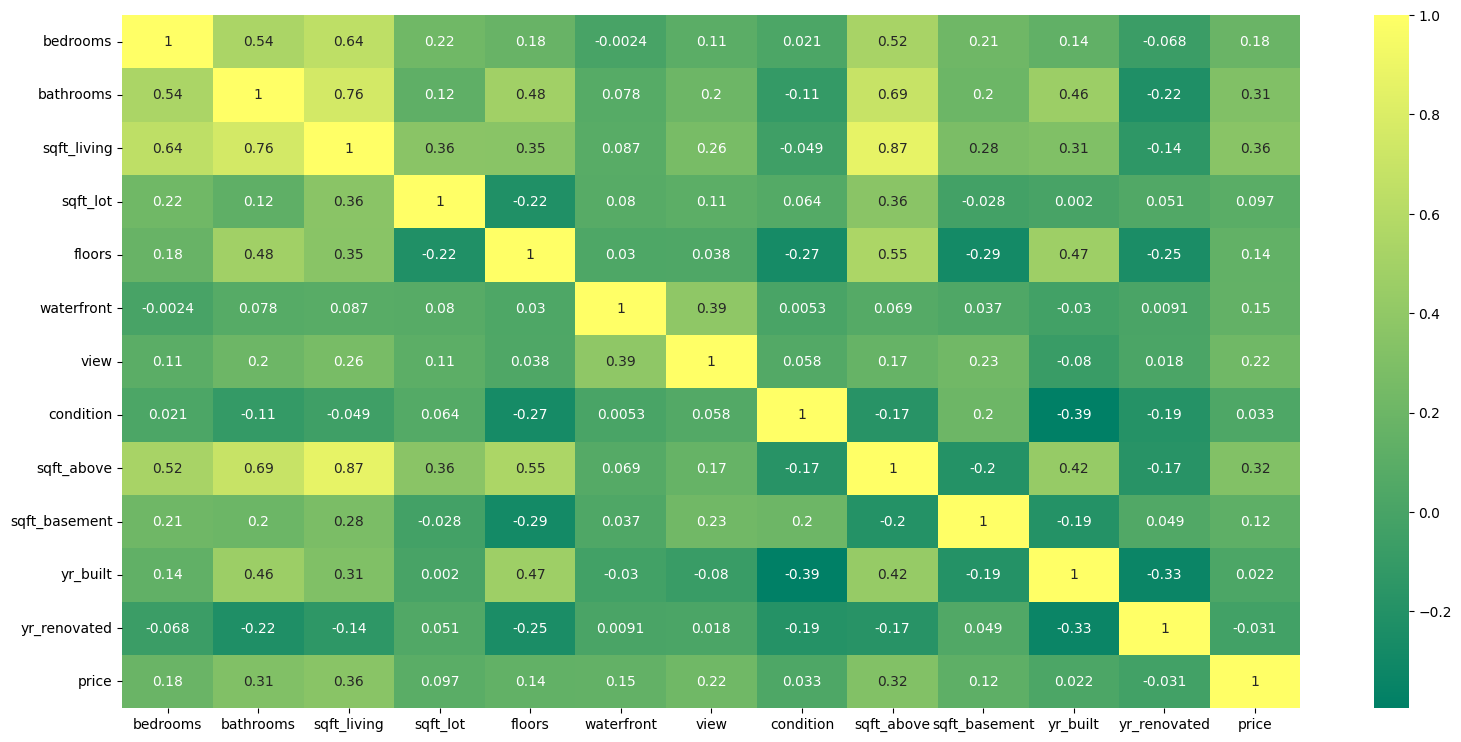

In [ ]:
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(),annot=True,cmap="summer")

In [ ]:
yr_present = datetime.datetime.now().year
yr_present

2023

In [ ]:
train_data['houseage'] = yr_present - train_data['yr_renovated']
train_data.loc[train_data['yr_renovated'] == 0, 'houseage'] = yr_present - train_data['yr_built']

<ipython-input-21-394d4c8fab76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="summer")


<Axes: >

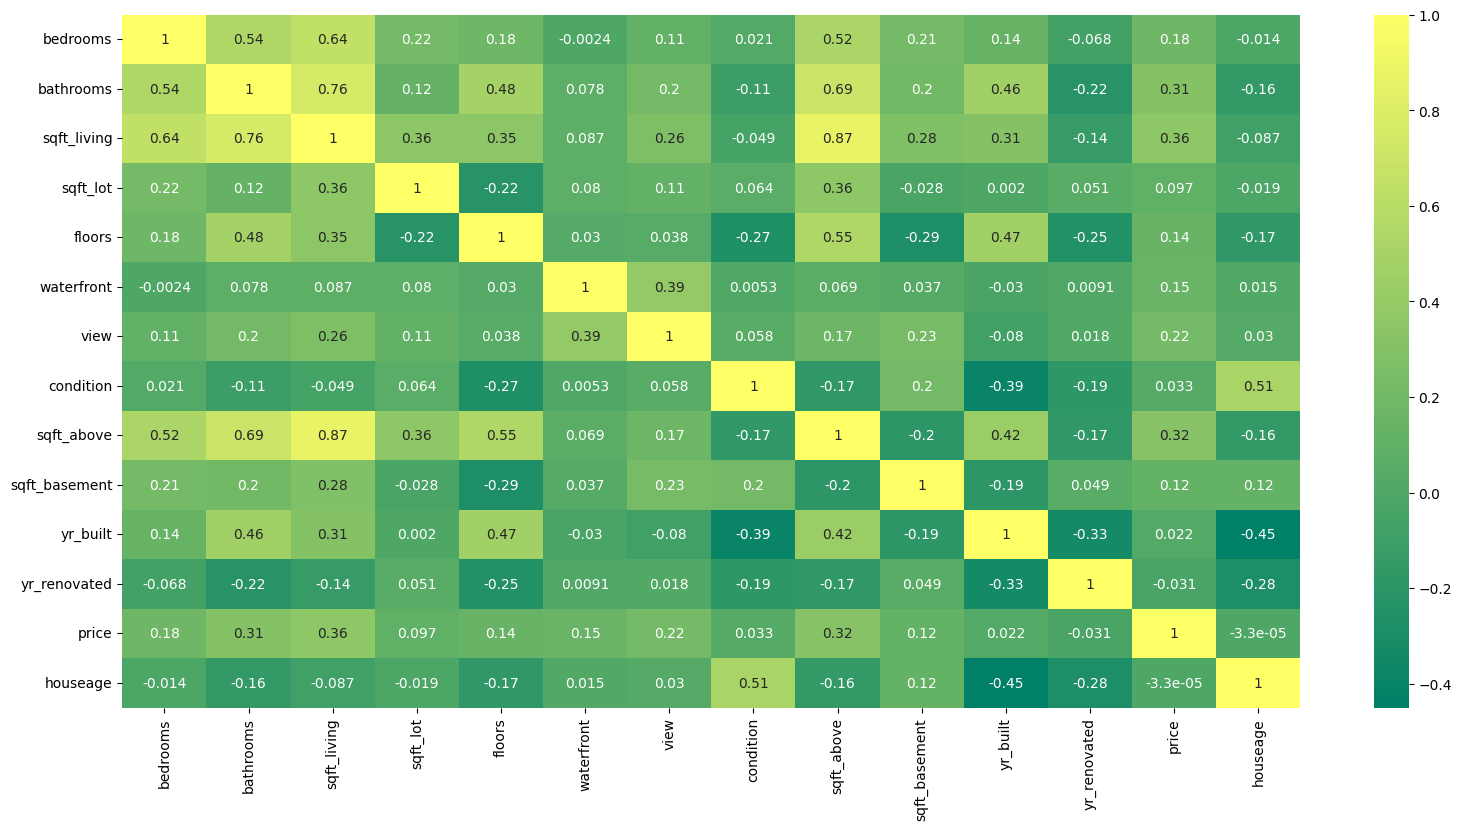

In [ ]:
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(),annot=True,cmap="summer")

In [ ]:
drop1=['yr_built','yr_renovated','houseage','condition']
train_data=train_data.drop(columns=drop1)

<ipython-input-23-394d4c8fab76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="summer")


<Axes: >

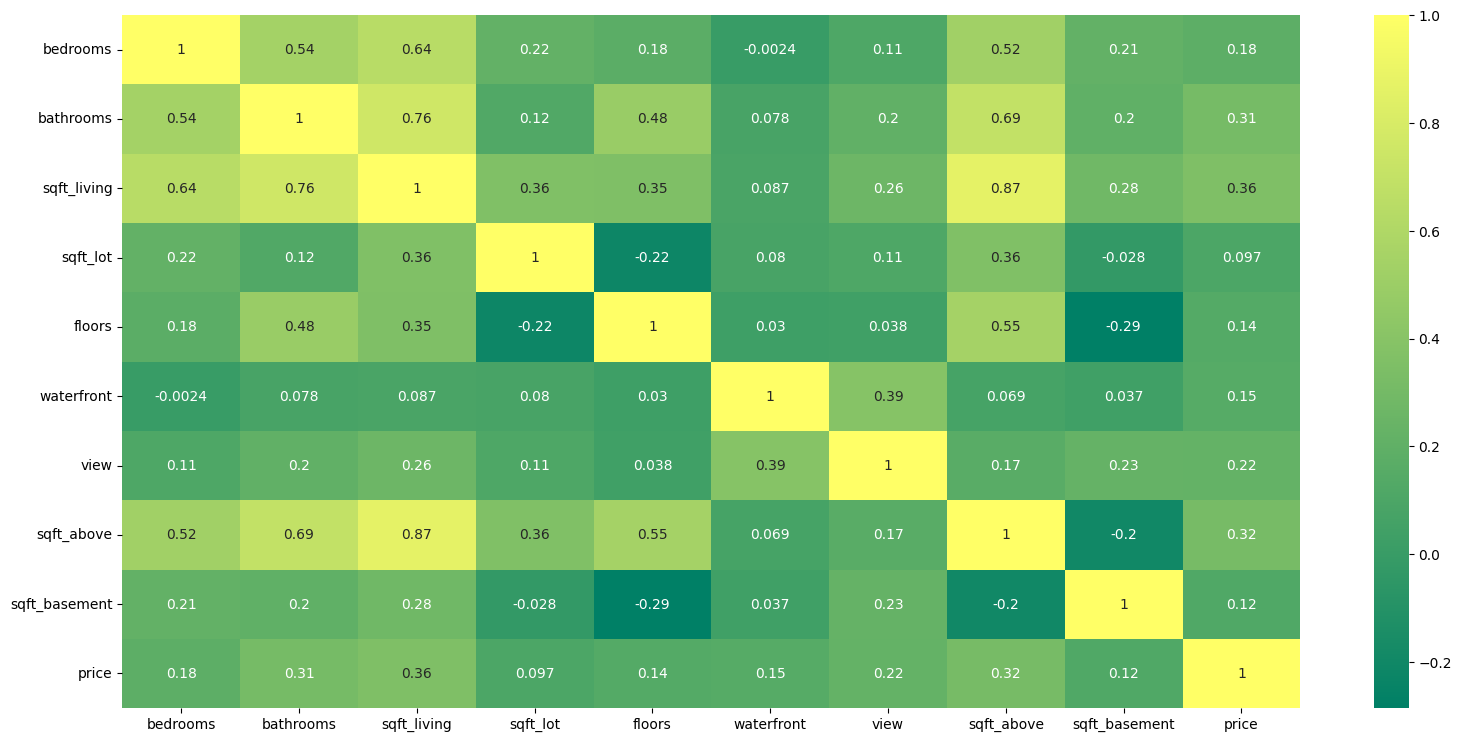

In [ ]:
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(),annot=True,cmap="summer")

In [ ]:
train_data['avg_sqft'] = train_data[['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']].mean(axis=1)

<ipython-input-25-394d4c8fab76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(),annot=True,cmap="summer")


<Axes: >

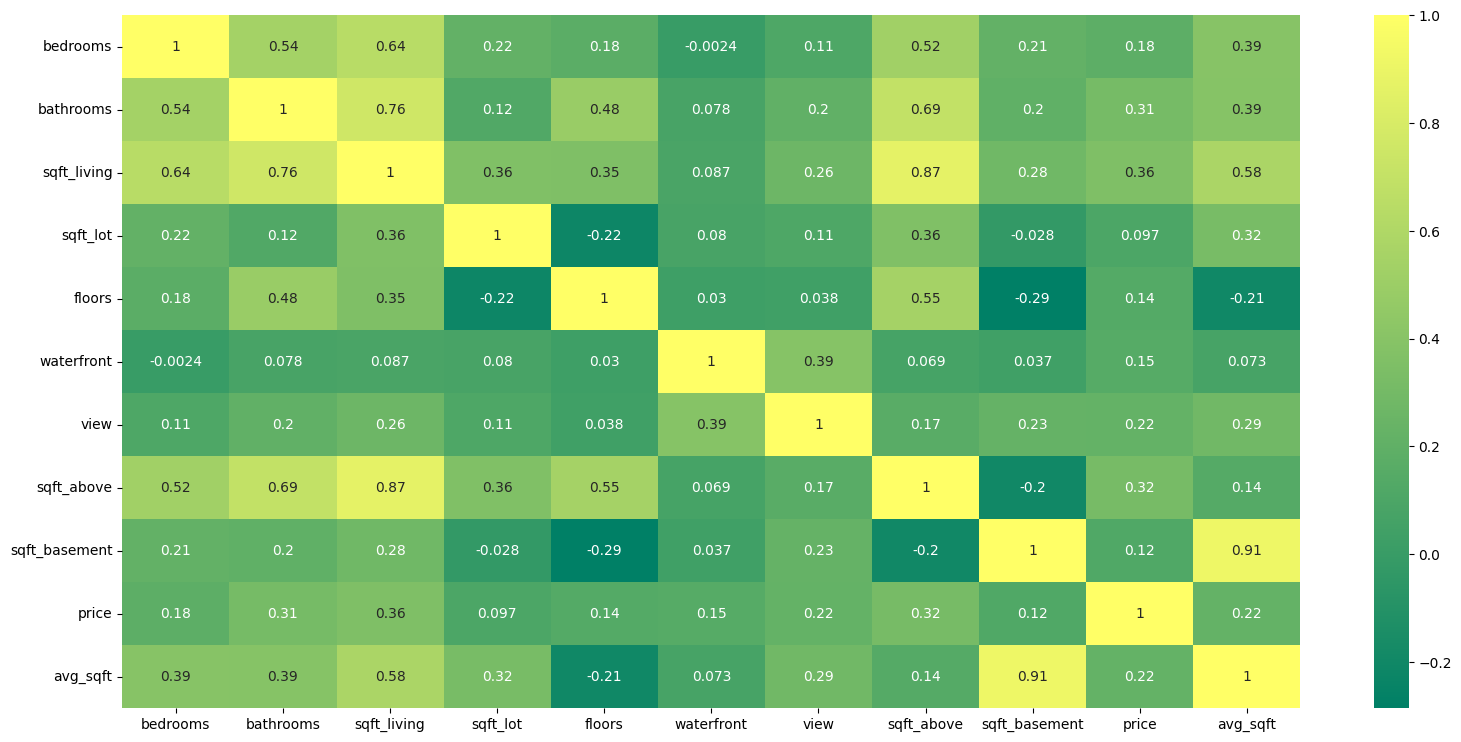

In [ ]:
plt.figure(figsize=(19,9))
sns.heatmap(train_data.corr(),annot=True,cmap="summer")

In [ ]:
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,street,city,statezip,country,price,avg_sqft
28,5.0,2.50,7.944847,11.120164,2.0,0,0,7.944847,0.000000,23525 SE 32nd Way,Issaquah,WA 98029,USA,675000.0,6.752464
1144,2.0,1.00,6.685861,8.111028,1.0,0,0,6.685861,0.000000,108 NW 41st St,Seattle,WA 98107,USA,373500.0,5.370687
2794,4.0,2.50,7.555382,8.946896,2.0,0,0,7.555382,0.000000,4513 186th Ave SE,Issaquah,WA 98027,USA,620000.0,6.014415
742,4.0,1.75,7.544861,8.987322,1.0,0,0,7.131699,6.463029,2145 N 178th St,Shoreline,WA 98133,USA,375000.0,7.531728
1662,5.0,3.00,8.200014,9.016756,2.0,0,3,7.840313,7.003974,17200 SE 29th Ct,Bellevue,WA 98008,USA,1595000.0,8.015264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2654,5.0,6.75,9.173780,9.477998,1.0,1,4,8.480737,8.480737,5044 Butterworth Rd,Mercer Island,WA 98040,USA,4668000.0,8.903313
1164,2.0,1.00,6.608001,9.328212,1.0,0,0,6.608001,0.000000,11050 24th Pl SW,Seattle,WA 98146,USA,235750.0,5.636053
4029,3.0,2.50,7.327123,8.335911,2.0,0,0,7.327123,0.000000,24312 226th Ave SE,Maple Valley,WA 98038,USA,296475.0,5.747539
2087,3.0,1.00,7.252054,8.529319,1.0,0,0,6.814543,6.216606,10711 Ashworth Ave N,Seattle,WA 98133,USA,410000.0,7.203131


In [ ]:
reg=LinearRegression()

In [ ]:
train_data=train_data.drop(['country'],axis=1)

In [ ]:
train_data=train_data.drop(['statezip'],axis=1)

In [ ]:
train_data=train_data.drop(['street'],axis=1)

In [ ]:
train_data=train_data.drop(['city'],axis=1)

In [ ]:
X_train,y_train = train_data.drop(['price'],axis=1),train_data['price']

In [ ]:
reg=LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
test_data=X_test.join(y_test)

In [ ]:
test_data['sqft_basement']=np.log(test_data["sqft_basement"]+1)
test_data['sqft_living']=np.log(test_data["sqft_living"]+1)
test_data['sqft_lot']=np.log(test_data["sqft_lot"]+1)
test_data['sqft_above']=np.log(test_data["sqft_above"]+1)

In [ ]:
drop2=['yr_built','yr_renovated','condition']
test_data=test_data.drop(columns=drop2)

In [ ]:
test_data=test_data.drop(['country'],axis=1)

In [ ]:
test_data=test_data.drop(['statezip'],axis=1)

In [ ]:
test_data=test_data.drop(['street'],axis=1)


In [ ]:
test_data=test_data.drop(['city'],axis=1)

In [ ]:
test_data['avg_sqft'] = test_data[['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement']].mean(axis=1)

In [ ]:
X_test,y_test = test_data.drop(['price'],axis=1),test_data['price']

In [ ]:
reg.score(X_test,y_test)

0.4040510402830181

In [ ]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,avg_sqft
617,4.0,2.25,7.669028,8.757155,2.0,0,0,7.669028,0.000000,6.023803
3399,5.0,3.00,7.871311,8.608495,2.0,0,0,7.871311,0.000000,6.087779
4023,3.0,2.00,7.403061,7.940584,1.0,0,3,6.710523,6.710523,7.191173
1781,3.0,2.00,7.669028,8.501876,1.0,0,0,6.976348,6.976348,7.530900
907,3.0,1.75,7.384610,9.413118,1.0,0,0,7.384610,0.000000,6.045585
...,...,...,...,...,...,...,...,...,...,...
1137,4.0,2.25,8.086718,10.442726,2.0,0,0,8.086718,0.000000,6.654040
3344,5.0,2.25,7.669028,8.976009,1.0,0,0,6.976348,6.976348,7.649433
4464,3.0,1.75,7.591357,8.740497,1.0,0,1,6.994850,6.792344,7.529762
1927,3.0,3.25,7.340187,7.305188,2.0,0,0,7.340187,0.000000,5.496390


In [ ]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,avg_sqft
28,5.0,2.50,7.944847,11.120164,2.0,0,0,7.944847,0.000000,6.752464
1144,2.0,1.00,6.685861,8.111028,1.0,0,0,6.685861,0.000000,5.370687
2794,4.0,2.50,7.555382,8.946896,2.0,0,0,7.555382,0.000000,6.014415
742,4.0,1.75,7.544861,8.987322,1.0,0,0,7.131699,6.463029,7.531728
1662,5.0,3.00,8.200014,9.016756,2.0,0,3,7.840313,7.003974,8.015264
...,...,...,...,...,...,...,...,...,...,...
2654,5.0,6.75,9.173780,9.477998,1.0,1,4,8.480737,8.480737,8.903313
1164,2.0,1.00,6.608001,9.328212,1.0,0,0,6.608001,0.000000,5.636053
4029,3.0,2.50,7.327123,8.335911,2.0,0,0,7.327123,0.000000,5.747539
2087,3.0,1.00,7.252054,8.529319,1.0,0,0,6.814543,6.216606,7.203131


In [ ]:
prediction=reg.predict(X_test)

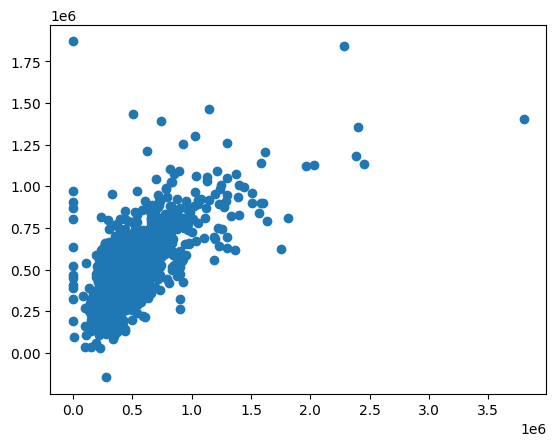

In [ ]:
plt.scatter(y_test,prediction)

<ipython-input-56-cce7b5f85414>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction),bins=5)


<Axes: xlabel='price', ylabel='Density'>

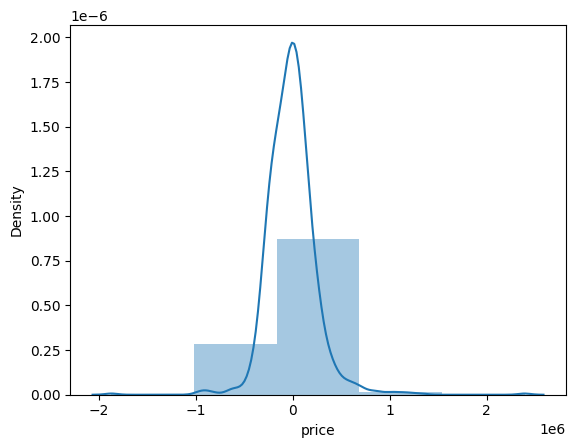

In [ ]:
sns.distplot((y_test-prediction),bins=5)